In [31]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 

print(X)
print(y)

     cap-shape cap-surface cap-color bruises odor gill-attachment  \
0            x           s         n       t    p               f   
1            x           s         y       t    a               f   
2            b           s         w       t    l               f   
3            x           y         w       t    p               f   
4            x           s         g       f    n               f   
...        ...         ...       ...     ...  ...             ...   
8119         k           s         n       f    n               a   
8120         x           s         n       f    n               a   
8121         f           s         n       f    n               a   
8122         k           y         n       f    y               f   
8123         x           s         n       f    n               a   

     gill-spacing gill-size gill-color stalk-shape  ...  \
0               c         n          k           e  ...   
1               c         b          k           e  .

In [32]:
import pandas as pd
import numpy as np

def transform_categorical_data(series):
    unique = list(series.unique())
    def func(value):
        return unique.index(value)
    series = series.apply(func)
    return series

for col in X:
    X[col] = transform_categorical_data(X[col])

y["poisonous"] = (y["poisonous"] == "p").astype(int) # p is 1, e is 0
print(X.head())
print(y.head())

   cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          0            0          0        0     0                0   
1          0            0          1        0     1                0   
2          1            0          2        0     2                0   
3          0            1          2        0     0                0   
4          0            0          3        1     3                0   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          0           0            0  ...   
1             0          1           0            0  ...   
2             0          1           1            0  ...   
3             0          0           1            0  ...   
4             1          1           0            1  ...   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         0                       0                       0   
1                         0                     

/var/folders/jl/7dg7lsrx3d941ctmwn5wlkvr0000gp/T/ipykernel_77472/4191413954.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = transform_categorical_data(X[col])
/var/folders/jl/7dg7lsrx3d941ctmwn5wlkvr0000gp/T/ipykernel_77472/4191413954.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["poisonous"] = (y["poisonous"] == "p").astype(int) # p is 1, e is 0


In [33]:
df = X.copy()
df["poisonous"] = y["poisonous"].copy()
df.corr()["poisonous"].sort_values()

gill-size                  -0.540024
gill-spacing               -0.348387
cap-surface                -0.169663
ring-number                -0.152261
gill-attachment            -0.129200
veil-color                 -0.120766
stalk-shape                -0.102019
cap-color                   0.042028
stalk-color-below-ring      0.098476
cap-shape                   0.112110
population                  0.155254
habitat                     0.191297
stalk-color-above-ring      0.225294
stalk-root                  0.337542
gill-color                  0.412869
bruises                     0.501530
stalk-surface-below-ring    0.532452
stalk-surface-above-ring    0.552044
ring-type                   0.556515
spore-print-color           0.560715
odor                        0.582015
poisonous                   1.000000
veil-type                        NaN
Name: poisonous, dtype: float64

In [34]:
X.drop(["veil-type", "stalk-root"], axis=1, inplace=True) # I removed because of missing values

X.isna().any()

/var/folders/jl/7dg7lsrx3d941ctmwn5wlkvr0000gp/T/ipykernel_77472/1230451124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(["veil-type", "stalk-root"], axis=1, inplace=True) # I removed because of missing values


cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential

num_features = X.shape[1]
print(num_features)

model = Sequential()
model.add(layers.Dense(num_features, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["binary_accuracy"])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

20
Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.6465 - loss: 0.6388 - val_binary_accuracy: 0.9020 - val_loss: 0.2784
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.9113 - loss: 0.2485 - val_binary_accuracy: 0.9350 - val_loss: 0.1783
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.9390 - loss: 0.1675 - val_binary_accuracy: 0.9547 - val_loss: 0.1340
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.9472 - loss: 0.1354 - val_binary_accuracy: 0.9641 - val_loss: 0.0967
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.9626 - loss: 0.0981 - val_binary_accuracy: 0.9764 - val_loss: 0.0710
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.9750 - loss: 0.0723 - val_binary_accuracy: 0.9823 - val_loss: 0.0553
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.9851 - loss: 0.0559 - val_binary_accuracy: 0.9882 - val_loss: 0.0455
Epo

In [38]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,325 (5.18 KB)

 Trainable params: 441 (1.72 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 884 (3.46 KB)

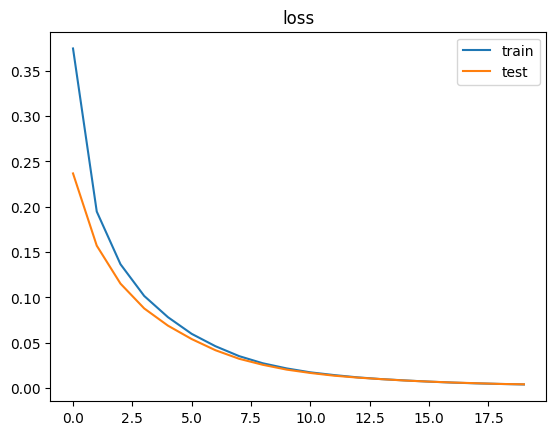

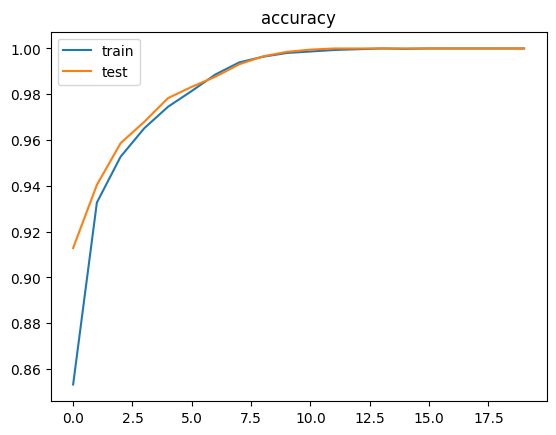

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title("loss")
ax = sns.lineplot(history.history["loss"], label="train")
sns.lineplot(history.history["val_loss"], ax=ax, label="test")
plt.show()

plt.title("accuracy")
ax = sns.lineplot(history.history["binary_accuracy"], label="train")
sns.lineplot(history.history["val_binary_accuracy"], ax=ax, label="test")
plt.show()

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[Text(0.5, 23.52222222222222, 'Actual labels'),
 Text(50.722222222222214, 0.5, 'Predicted labels')]

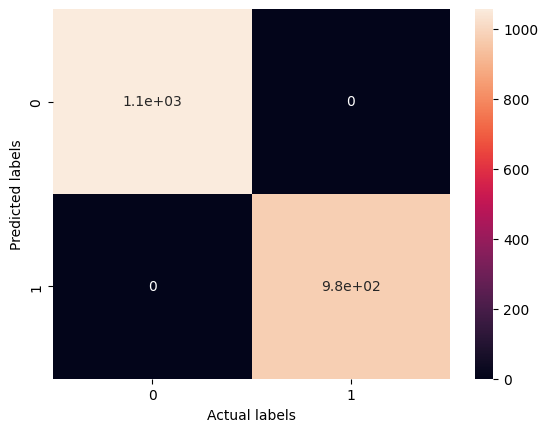

In [37]:
from tensorflow.math import confusion_matrix
predictions = np.round(model.predict(X_test))
matrix = confusion_matrix(labels=y_test, predictions=predictions[:, 0])

import seaborn as sns
ax = sns.heatmap(matrix, annot=True)
ax.set(xlabel="Actual labels", ylabel="Predicted labels")